In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import required Libraries and Models.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score

Define constants.

In [ ]:
#define constants
LABELS = ['label_1', 'label_2', 'label_3', 'label_4']
FEATURES = ['feature_' + str(i) for i in range(1, 257)]
target_label = 'label_4'

Import train, valid and test datasets.

In [ ]:
#file paths for the datasets
train_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Lab1/train.csv'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Lab1/valid.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Lab1/test.csv'

#load the train dataset
train_data_set_original = pd.read_csv(train_path)

#load the valid dataset
valid_data_set_original = pd.read_csv(valid_path)

#load the test dataset
test_data_set_original = pd.read_csv(test_path)

Get the copies of train, valid and test datasets.

In [ ]:
#get a copy of the train dataset
train_data_set = train_data_set_original.copy()

#get a copy of the valid dataset
valid_data_set = valid_data_set_original.copy()

#get a copy of the test dataset
test_data_set = test_data_set_original.copy()

Visualize train, valid and test datasets.



In [ ]:
train_data_set.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [ ]:
valid_data_set.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [ ]:
test_data_set.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


Drop the columns of the labels that contains null values.

In [ ]:
#get the columns contain null values
train_null_columns = train_data_set.columns[train_data_set.isnull().sum() > 0]

#drop rows with null values in the labels for training dataset
if (target_label in train_null_columns):
  train_data_set = train_data_set.dropna(subset=[target_label], how='any')

Fill the null values in the features with their means in the train, valid and test datasets.

In [ ]:
#fill null values with the mean in train data set.
train_data_set = train_data_set.fillna(train_data_set.mean())

#fill null values with the mean in valid data set.
valid_data_set = valid_data_set.fillna(valid_data_set.mean())

#fill null values with the mean in test data set.
test_data_set = test_data_set.fillna(test_data_set.mean())

Separate features and labels in the train, valid and test datasets.

In [ ]:
#seperate features and labels in train dataset.
train_features = train_data_set[FEATURES]
train_target_label = train_data_set[target_label]

#seperate features and labels in valid dataset.
valid_features = valid_data_set[FEATURES]
valid_target_label = valid_data_set[target_label]

#seperate features and labels in test dataset.
test_features = test_data_set[FEATURES]
test_target_label = test_data_set[target_label]

# 1. Predicting Label 4 without Feature Engineering

Standarize the features in the train, valid and test datasets.

In [ ]:
scaler = StandardScaler()

#standardize the features in train dataset
train_features = scaler.fit_transform(train_features)

#standardize the features in valid dataset
valid_features = scaler.transform(valid_features)

#standardize the features in test dataset
test_features = scaler.transform(test_features)

Train a model on the train dataset. Three classifires have been used and compared.

1. Support Vector Classifier(SVC)
2. Random Forest Classifier
3. K-Nearest Neighbors(KNN)

In [ ]:
#define a list of classification models
classification_models = [
    ('K Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(kernel='linear'))
]

for model_name, model in classification_models:

  model.fit(train_features, train_target_label)

  #predict on the train data
  y_pred_train = model.predict(train_features)

  #calculate metrics for classification evaluation on train data
  accuracy = accuracy_score(train_target_label, y_pred_train)
  precision = precision_score(train_target_label, y_pred_train, average='weighted', zero_division=1)
  recall = recall_score(train_target_label, y_pred_train, average='weighted')

  print(f"Metrics for {model_name} on train data:")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print("\n")

  #predict on the validation data
  y_pred_valid = model.predict(valid_features)

  #calculate metrics for classification evaluation on validation data
  accuracy = accuracy_score(valid_target_label, y_pred_valid)
  precision = precision_score(valid_target_label, y_pred_valid, average='weighted', zero_division=1)
  recall = recall_score(valid_target_label, y_pred_valid, average='weighted')

  print(f"Metrics for {model_name} on validation data:")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print("\n")

Metrics for K Neighbors on train data:
Accuracy: 0.995617110799439
Precision: 0.9956243334715275
Recall: 0.995617110799439


Metrics for K Neighbors on validation data:
Accuracy: 0.9946666666666667
Precision: 0.9947064676616915
Recall: 0.9946666666666667


Metrics for Random Forest on train data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Metrics for Random Forest on validation data:
Accuracy: 0.856
Precision: 0.8803000000000001
Recall: 0.856


Metrics for SVM on train data:
Accuracy: 0.983625525946704
Precision: 0.9834985204905342
Recall: 0.983625525946704


Metrics for SVM on validation data:
Accuracy: 0.9626666666666667
Precision: 0.9640391492190096
Recall: 0.9626666666666667




Predict on the test data using the best model.

In [ ]:
#predict on the test data
best_model = KNeighborsClassifier()
best_model.fit(train_features, train_target_label)
y_pred_test_before = best_model.predict(test_features)

# 2. Predicting Label 4 with Feature Engineering

Use feature selection based on correlation matrix and feature extraction based on PCA(Principal Component Analysis).

### Feature Selection

Visualize the distribution of the target label in train dataset.

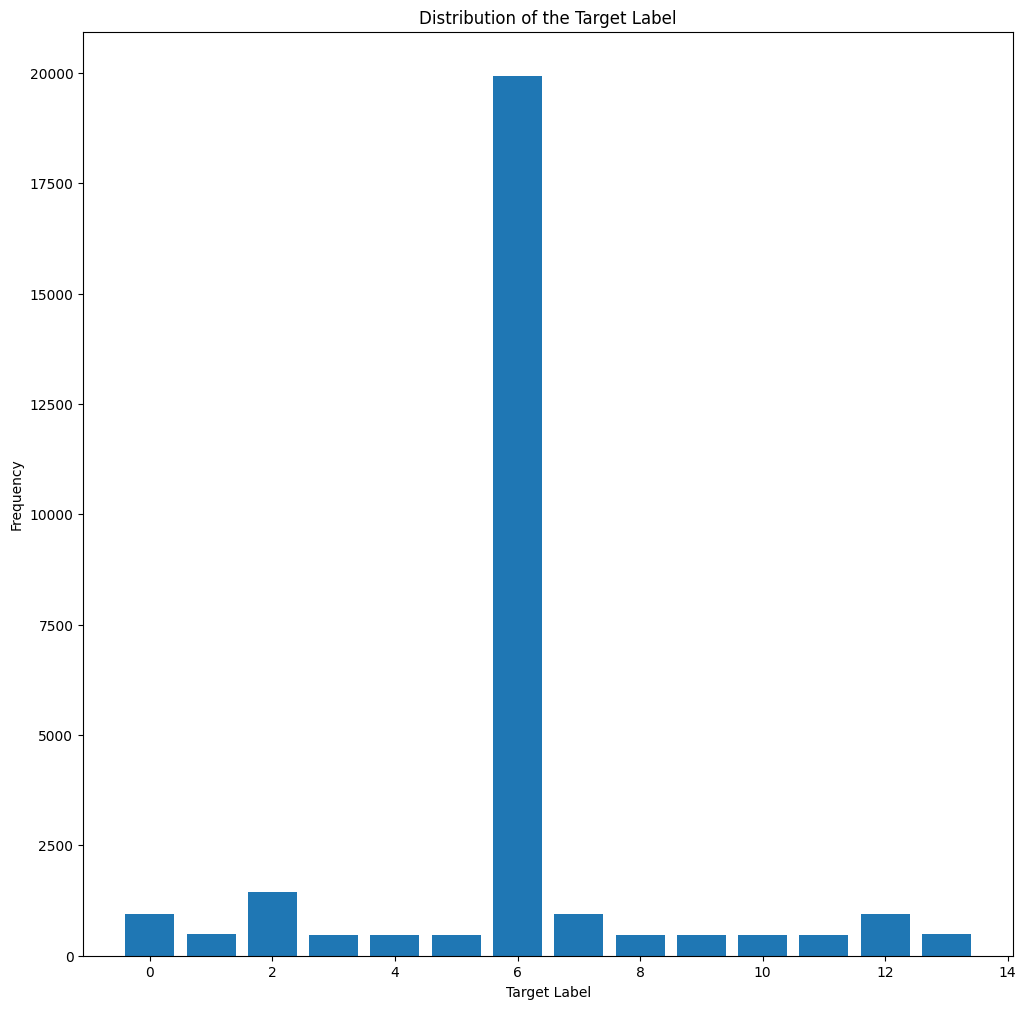

In [ ]:
#plotting the distribution of target label in train dataset
labels, counts = np.unique(train_target_label, return_counts=True)
plt.figure(figsize=(12, 12))
plt.bar(labels, counts)
plt.xlabel('Target Label')
plt.ylabel('Frequency')
plt.title('Distribution of the Target Label')
plt.show()

Calculate the correlation matrix of the features in the train dataset.

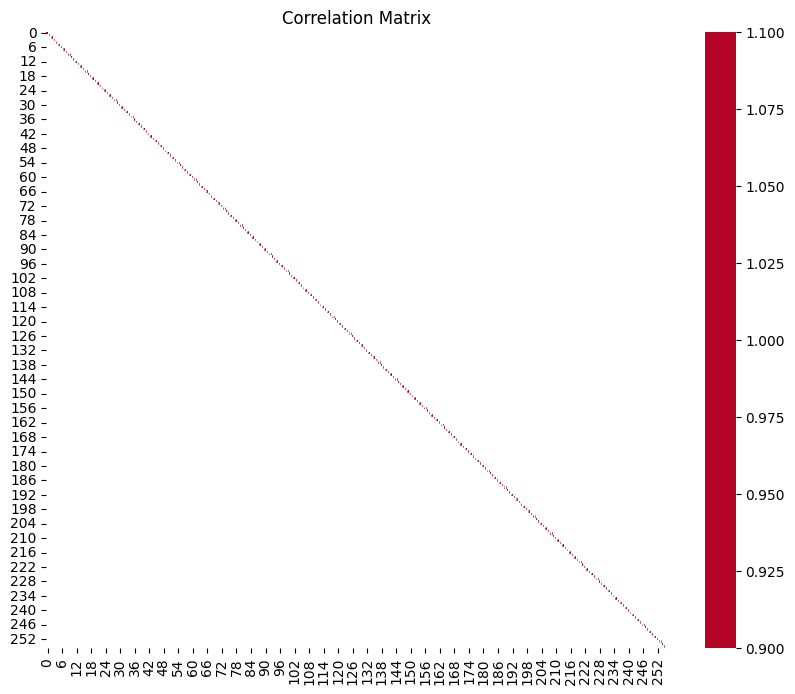

In [ ]:
#calculate the correlation matrix
corr_matrix = pd.DataFrame(train_features).corr()

#set the threshold for correlation
corr_threshold = 0.9

#get the filtered correlation matrix and plot it
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshold) | (corr_matrix < -corr_threshold)]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are most correlated with each other using the traning dataset. Threshold of 0.9 has been used to find the most correlated features.

In [ ]:
most_correlated_features = set()

#get most correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            col_name = corr_matrix.columns[i]
            most_correlated_features.add(col_name)

Remove the most correlated features from all the datasets.

In [ ]:
#remove most correlated features
train_features = pd.DataFrame(train_features).drop(columns=most_correlated_features)
valid_features = pd.DataFrame(valid_features).drop(columns=most_correlated_features)
test_features = pd.DataFrame(test_features).drop(columns=most_correlated_features)

Print the new shapes of all the datasets after removing the most correlated features.

In [ ]:
#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(train_features.shape))

#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(valid_features.shape))

#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(test_features.shape))

New Features in Train Dataset: (28520, 256)
New Features in Valid Dataset: (750, 256)
New Features in Test Dataset: (750, 256)


Identify the features that are most correlated with the target label using the traning dataset. Threshold of 0.05 has been used to find the most correlated features.

In [ ]:
#calculate the correlation matrix between features and target label in train dataset
corr_with_target = pd.DataFrame(train_features).corrwith(train_target_label)

#set the correlation threshold
corr_threshold = 0.05

#select features that meet the correlation threshold
most_correlated_features_with_target = corr_with_target[corr_with_target.abs() > corr_threshold]

Extract the  most correlated features with the target label from all datasets.

In [ ]:
#extract the  most correlated features with the target label in train dataset
train_features = train_features[most_correlated_features_with_target.index]

#extract the  most correlated features with the target label in valid dataset
valid_features = valid_features[most_correlated_features_with_target.index]

#extract the  most correlated features with the target label in test dataset
test_features = test_features[most_correlated_features_with_target.index]

Print the new shapes of all the datasets after extracting the most correlated features.

In [ ]:
#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(train_features.shape))

#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(valid_features.shape))

#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(test_features.shape))

New Features in Train Dataset: (28520, 117)
New Features in Valid Dataset: (750, 117)
New Features in Test Dataset: (750, 117)


Standarize the features in the train, valid and test datasets.

In [ ]:
scaler = StandardScaler()

#standardize the features in train dataset
standardized_train_features = scaler.fit_transform(train_features)

#standardize the features in valid dataset
standardized_valid_features = scaler.transform(valid_features)

#standardize the features in test dataset
standardized_test_features = scaler.transform(test_features)

### Feature Extraction

Extract can combine the features that are highly significant in predicting the label using PCA.

Extract the features that can explain the variance of the label to 99%

Display the resulting explained variances of each principal component

In [ ]:
variance_threshold = 0.99

#apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train = pca.fit_transform(standardized_train_features)
pca_valid = pca.transform(standardized_valid_features)
pca_test = pca.transform(standardized_test_features)

#explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train.shape))
#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid.shape))
#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test.shape))

New Features in Train Dataset: (28520, 80)
New Features in Valid Dataset: (750, 80)
New Features in Test Dataset: (750, 80)


Used the trained model using the extracted features and preddict and get the evaluation metrics. Here also SVC, RainForest and KNN classifiers have been used and compared.

In [ ]:
#define a list of classification models
classification_models = [
    ('K Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(kernel='linear'))
]

#number of features used in PCA
num_of_features = pca_train.shape[1]
print(f"Number of features: {num_of_features}\n")

for model_name, model in classification_models:

  model.fit(pca_train, train_target_label)

  #predict on the train data
  y_pred_train = model.predict(pca_train)

  #calculate metrics for classification evaluation on train data
  accuracy = accuracy_score(train_target_label, y_pred_train)
  precision = precision_score(train_target_label, y_pred_train, average='weighted', zero_division=1)
  recall = recall_score(train_target_label, y_pred_train, average='weighted')

  print(f"Metrics for {model_name} on train data:")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print("\n")

  #predict on the validation data
  y_pred_valid = model.predict(pca_valid)

  #calculate metrics for classification evaluation on validation data
  accuracy = accuracy_score(valid_target_label, y_pred_valid)
  precision = precision_score(valid_target_label, y_pred_valid, average='weighted', zero_division=1)
  recall = recall_score(valid_target_label, y_pred_valid, average='weighted')

  print(f"Metrics for {model_name} on validation data:")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print("\n")



Number of features: 80

Metrics for K Neighbors on train data:
Accuracy: 0.994249649368864
Precision: 0.9942572075284647
Recall: 0.994249649368864


Metrics for K Neighbors on validation data:
Accuracy: 0.9906666666666667
Precision: 0.9907878787878789
Recall: 0.9906666666666667


Metrics for Random Forest on train data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Metrics for Random Forest on validation data:
Accuracy: 0.788
Precision: 0.8367814761215631
Recall: 0.788


Metrics for SVM on train data:
Accuracy: 0.9247896213183731
Precision: 0.9231120091500509
Recall: 0.9247896213183731


Metrics for SVM on validation data:
Accuracy: 0.904
Precision: 0.9005461220391043
Recall: 0.904




Predict on the test data using the best model.

According to the results KNeighbors classifier gives better predictions.Therefore predictions on the test data is done by using KNeighbors classifier.

In [ ]:
#predict on the test data
best_model = KNeighborsClassifier()
best_model.fit(pca_train, train_target_label)
y_pred_test_after = best_model.predict(pca_test)

#Create the CSV file.

Define method to create the csv file.

In [ ]:
# define method to create the dataframe and save it as a csv file
def create_csv(features, pred_before_fe, pred_after_fe, destination):
  feature_count = features.shape[1]

  header_row = [f"new_feature_{i}" for i in range(1,feature_count+1)]

  df = pd.DataFrame(features, columns  = header_row)

  df.insert(loc=0, column='Predicted labels before feature engineering', value=pred_before_fe)
  df.insert(loc=1, column='Predicted labels after feature engineering', value=pred_after_fe)
  df.insert(loc=2, column='No of new features', value=np.repeat(feature_count, features.shape[0]))

  df.to_csv(destination, index=False)

Save the csv file.

In [ ]:
destination = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Lab1/190583V_label4.csv'

# create the csv output file
create_csv(pca_test, y_pred_test_before, y_pred_test_after, destination)